In [ ]:
# MIT License
#
# @title Copyright (c) 2025 Ana Trisovic { display-mode: "form" }

# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# Module 3, Assignment 2: Descriptive Statistics

This assignment introduces the foundational concepts of data visualization in Python and provides hands-on experience with key techniques for exploring data trends. You'll learn how to create and customize common chart types—like pie charts, line plots, and bar graphs—using libraries such as `matplotlib` and `seaborn`.

Through multiple examples, the tutorial emphasizes not just how to visualize data, but also how to enhance visual appeal and clarity using styles, color palettes, and layout customization. By the end, you’ll be comfortable building aesthetically pleasing and insightful charts from scratch.

## Getting Started: Software Prerequisites & Setup

### 📦 Package Requirements

In this course, we'll be working with three essential Python libraries for data visualization These packages serve distinct and complementary purposes:

- **Pandas**: for handling and manipulating structured datasets.
- **Matplotlib**: the foundational plotting library for Python, offering fine-grained control over plots.
- **Seaborn**: built on top of Matplotlib, it provides a high-level interface for creating attractive and informative statistical graphics.

### 🛠 Installation

If these packages are not already installed in your environment, you can install them using `pip`

💬 You may see a warning or version compatibility notice (especially in environments like Google Colab). As long as the core functionality works, these can typically be ignored.

In [1]:
import pandas as pd

### Read and filter data

We first read in the file `Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv` as a DataFrame using Pandas. We name this DataFrame `brfss`. This data is about the nutrition, physical activity, and obesity for adults with demographic information such as income and geographical location (e.g. American state).

Then, we create a new DataFrame called `x` that is `brfss` that has been filtered to those rows who's `Question` column takes on the value `Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week`.

We use the `.head()` and `.shape` functions to examine your new DataFrame, `x` and to examine the original DataFrame `brfss`.

In [3]:
brfss = pd.read_csv("Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv")

In [4]:
x = brfss[brfss["Question"] =="Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week"]

In [5]:
x.shape

(9016, 33)

### Pivot Table

Now, we generate a pivot table from the `brfss` DataFrame, which we name `pivoted_df`. We use the following columns as the index: `YearEnd, LocationAbbr, Income`. The columns of the pivot table are from the `Question` column, and the values of the pivot table should be the average of the `Data_Value` column. Finally, we need reset the index because the pivoting process mixes up the index numbers.

We note that this pivot table will be useful for our analysis using `seaborn` later on.

In [8]:
pivoted_df = brfss.pivot_table(index=["YearEnd","LocationAbbr","Income"], columns='Question', values='Data_Value', aggfunc="mean").reset_index()
pivoted_df

Question,YearEnd,LocationAbbr,Income,Percent of adults aged 18 years and older who have an overweight classification,Percent of adults aged 18 years and older who have obesity,Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination),Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week,Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination),Percent of adults who engage in muscle-strengthening activities on 2 or more days a week,Percent of adults who engage in no leisure-time physical activity,Percent of adults who report consuming fruit less than one time daily,Percent of adults who report consuming vegetables less than one time daily
0,2011,AK,"$15,000 - $24,999",33.5,30.2,51.8,17.3,32.7,28.1,24.6,NaN,NaN
1,2011,AK,"$25,000 - $34,999",38.1,32.2,57.9,20.2,38.2,24.5,25.8,NaN,NaN
2,2011,AK,"$35,000 - $49,999",42.3,24.5,55.1,21.6,34.1,31.4,25.7,NaN,NaN
3,2011,AK,"$50,000 - $74,999",41.6,27.8,59.3,26.1,32.6,37.7,19.2,NaN,NaN
4,2011,AK,"$75,000 or greater",39.9,26.9,63.2,30.8,44.8,38.0,17.1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4873,2023,WY,"$35,000 - $49,999",34.9,33.0,57.6,25.7,39.9,38.7,32.0,NaN,NaN
4874,2023,WY,"$50,000 - $74,999",33.9,36.8,66.5,35.1,52.9,45.8,21.7,NaN,NaN
4875,2023,WY,"$75,000 or greater",37.5,33.3,69.9,32.9,53.7,41.2,17.1,NaN,NaN
4876,2023,WY,Data not reported,38.4,30.2,63.3,32.7,46.6,43.9,22.5,NaN,NaN


### Rename columns

Additionally, since the names of the columns of our pivot table are quite long now, we rename them as follows:

| Original column name | New column name |
| ----------- | ----------- |
| Percent of adults aged 18 years and older who have an overweight classification | Overweight |
| Percent of adults aged 18 years and older who have obesity | Obesity |
| Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination) | Meets Basic Activity |
| Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination) | Meets Basic Activity |
| Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week | Meets Full Guidelines |
| Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination) | Meets Basic Activity |
| Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination) | High Activity Level |
| Percent of adults who engage in muscle-strengthening activities on 2 or more days a week | Strength Training |
| Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination) | Meets Basic Activity |
| Percent of adults who engage in no leisure-time physical activity | Inactive |
| Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination) | Meets Basic Activity |
| Percent of adults who report consuming fruit less than one time daily | Low Fruit Intake |
| Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination) | Meets Basic Activity |
| Percent of adults who report consuming vegetables less than one time daily | Low Vegetable Intake |

In [10]:
rename_map = {
    'Percent of adults aged 18 years and older who have an overweight classification': 'Overweight',
    'Percent of adults aged 18 years and older who have obesity': 'Obesity',
    'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)': 'Meets Basic Activity',
    'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week': 'Meets Full Guidelines',
    'Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)': 'High Activity Level',
    'Percent of adults who engage in muscle-strengthening activities on 2 or more days a week': 'Strength Training',
    'Percent of adults who engage in no leisure-time physical activity': 'Inactive',
    'Percent of adults who report consuming fruit less than one time daily': 'Low Fruit Intake',
    'Percent of adults who report consuming vegetables less than one time daily': 'Low Vegetable Intake'
}

pivoted_df = pivoted_df.rename(columns=rename_map)

### Seaborn pairwise relationships

We can finally use `seaborn` to generate some descriptive statistics. In particular, we plot the pairwise relationships in `pivoted_df`, and we make sure to only use the numeric columns in `pivoted_df to do so. For the keyword arguments in the Seaborn `.pairplot()` function, we `alpha` to 0.6, where `alpha` represents the transparency of the plotted elements.

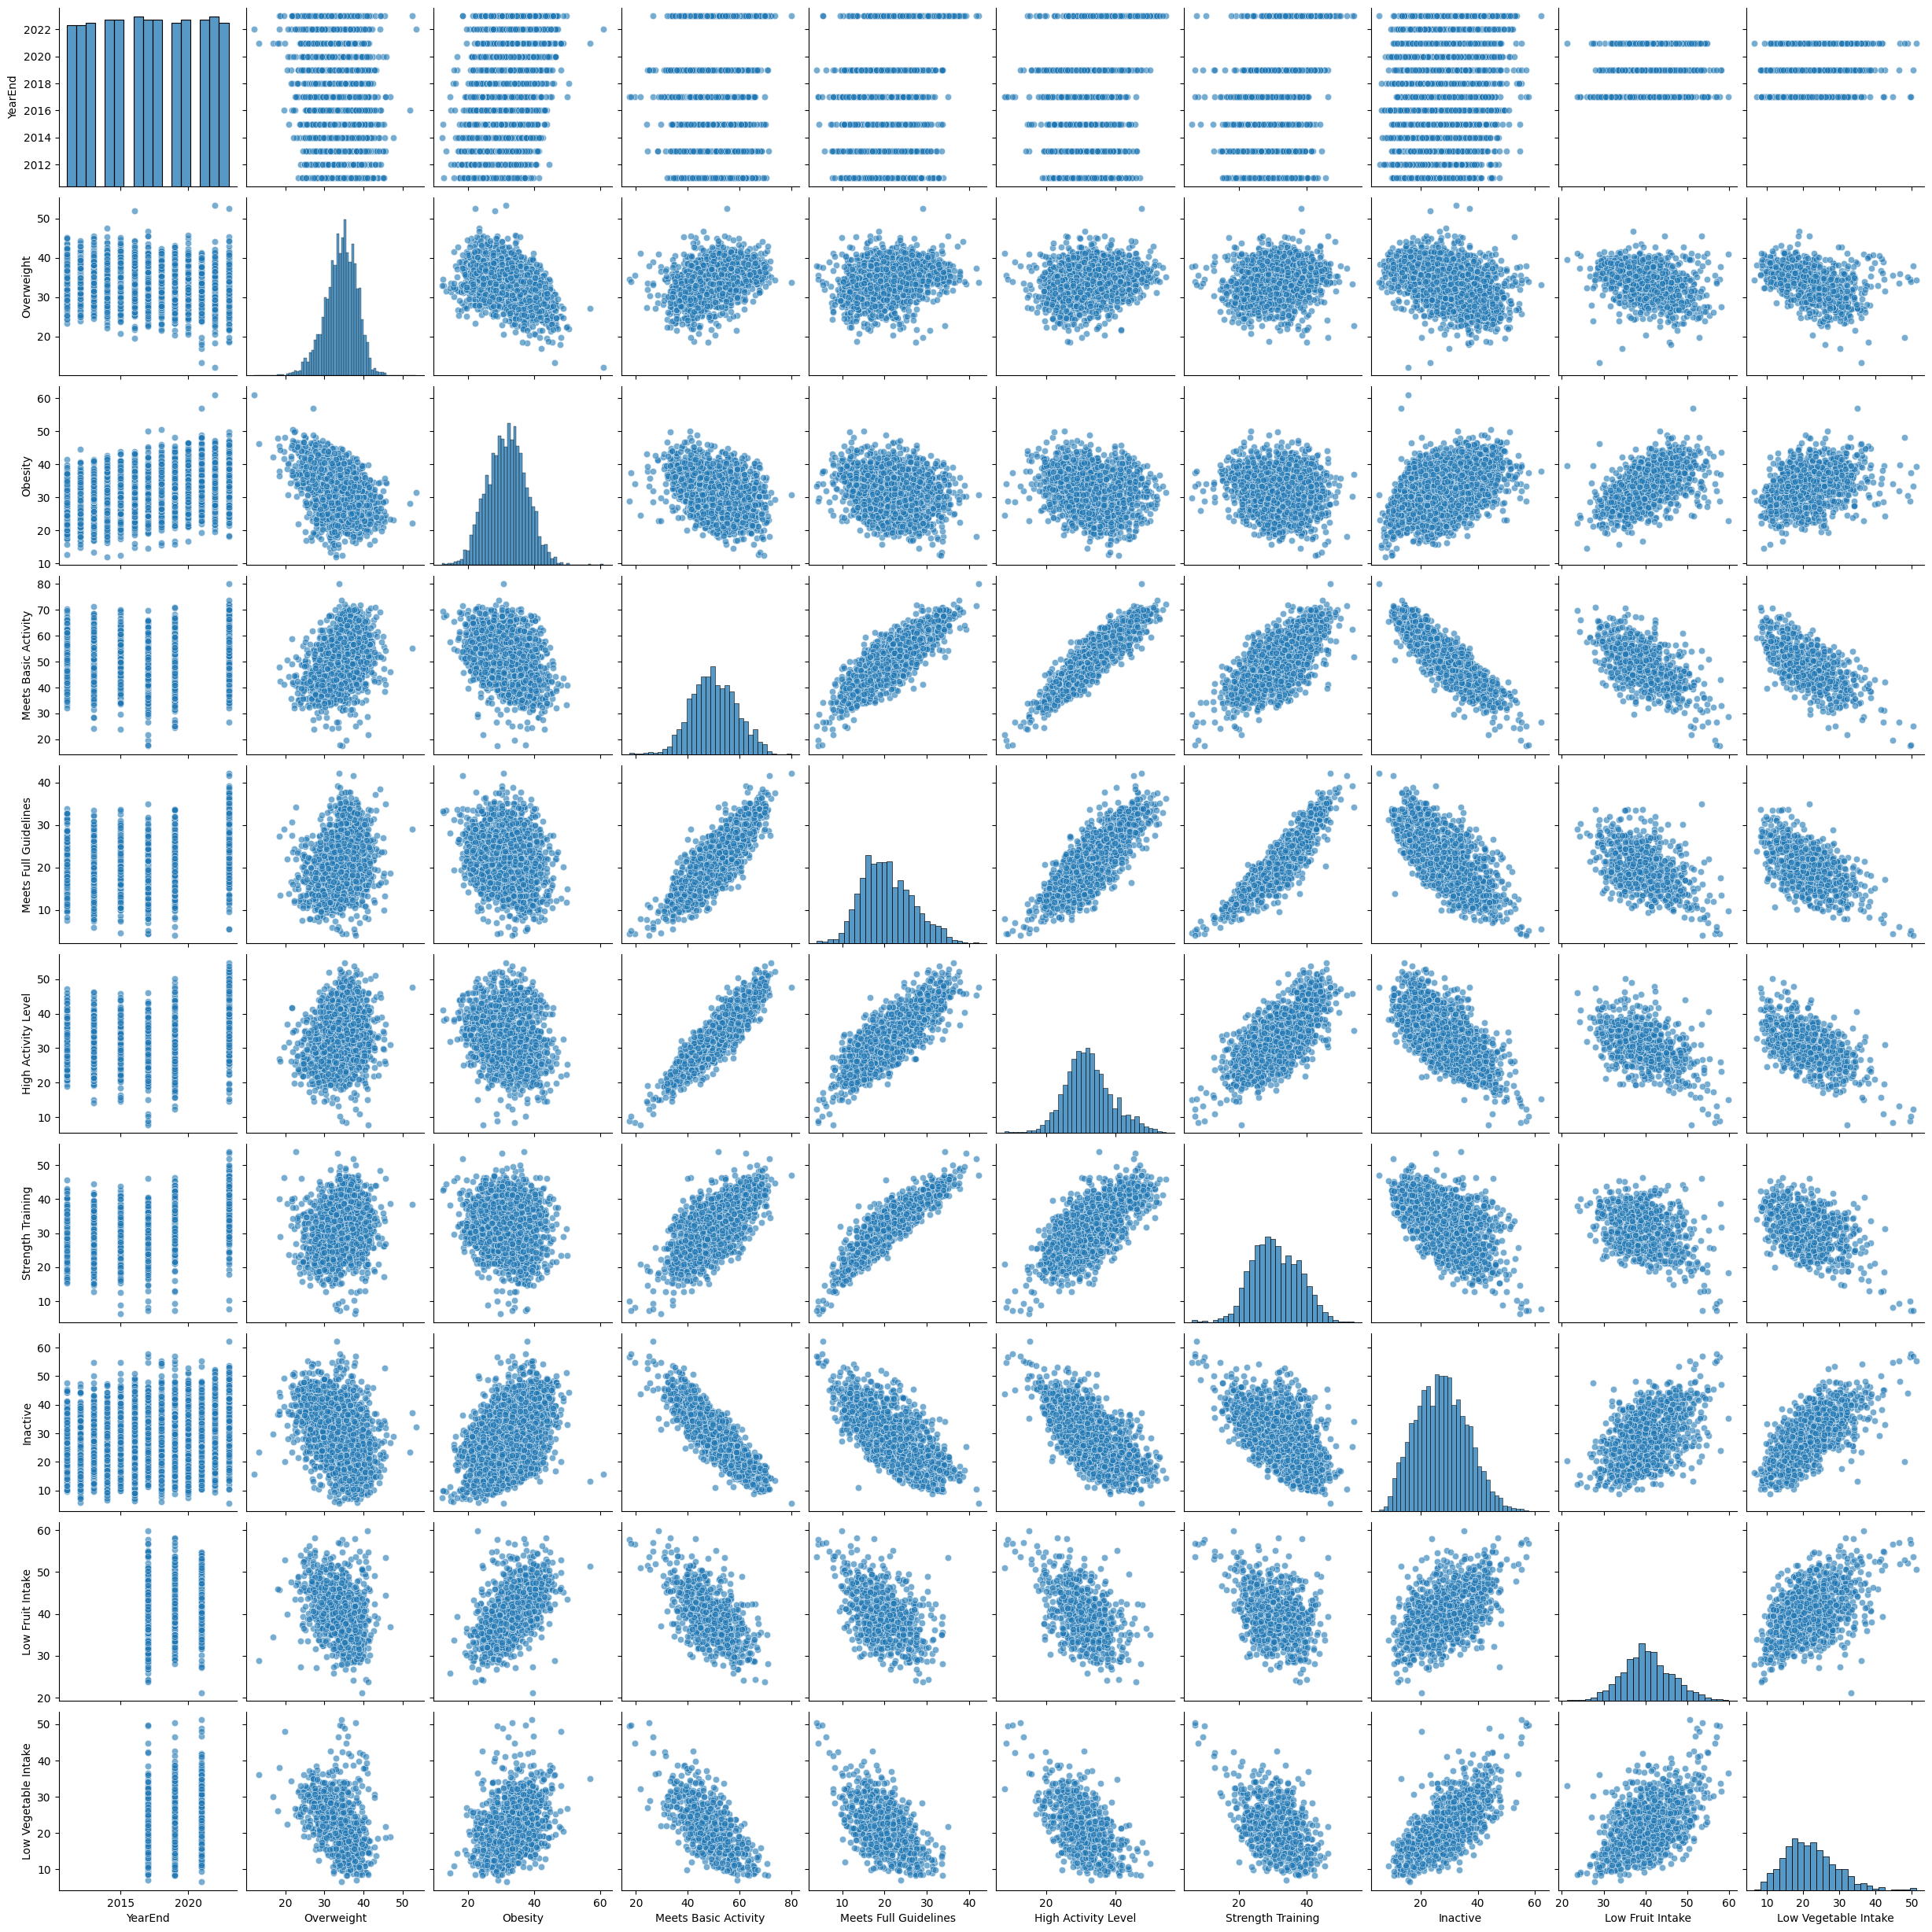

In [11]:
import seaborn as sns

sns.pairplot(pivoted_df.select_dtypes(include='number'), plot_kws={'alpha': 0.6})

### Seaborn bar chart

Like how we used `matplotlib` in Assignment 1, we can also use `seaborn` to generate a vertical bar chart. We will do so for the information in `pivoted_df`, using the column `Income` as the x-axis and the column `Obesity` as the y-axis.

<Axes: xlabel='Income', ylabel='Obesity'>

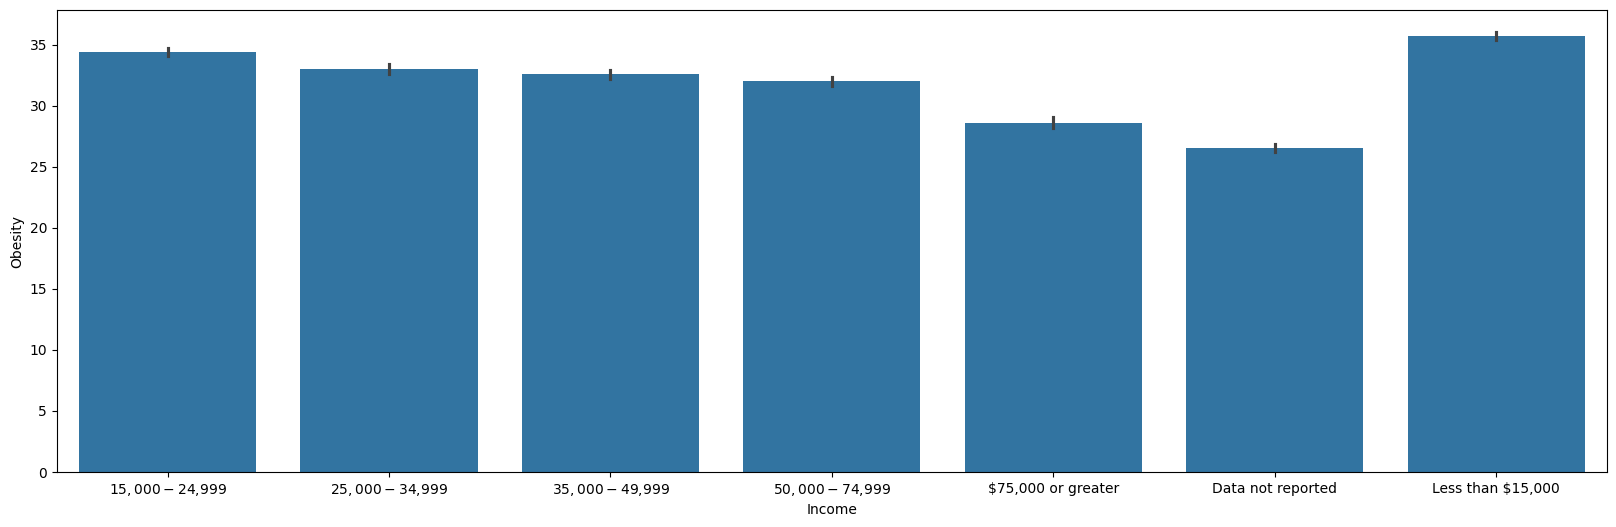

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 6))
sns.barplot(
    data=pivoted_df,
    x='Income',
    y='Obesity',
    ax=ax,
)

### Seaborn line chart

`seaborn` can also generate line charts; in particular, it can generate single-line line charts as well as multi-line line charts.

In the first line of code below, we generate a single-line line chart from the information in `pivoted_df`, where the x-axis is the `YearEnd` column and the y-axis values are the `Overweight` column.

The second line of code generates a multi-line line chart from the information in `pivoted_df`. The x-axis is the `YearEnd` column, and the line chart should consist of 3 lines, generated from the following 3 columns: `Obesity`, `Meets Basic Activity`, and `Inactive`.  

<Axes: xlabel='YearEnd', ylabel='Overweight'>

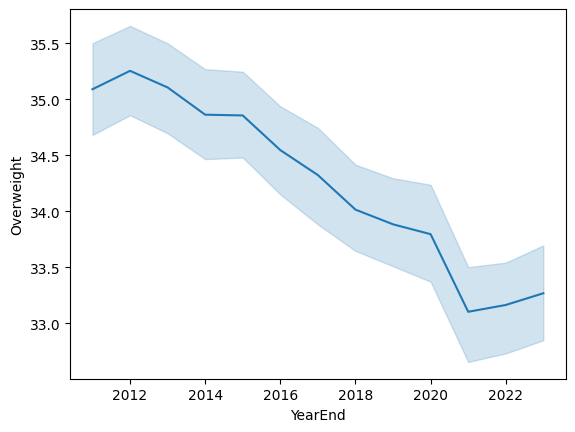

In [ ]:
sns.lineplot(data=pivoted_df, x='YearEnd', y='Overweight')

<Axes: xlabel='YearEnd', ylabel='Obesity'>

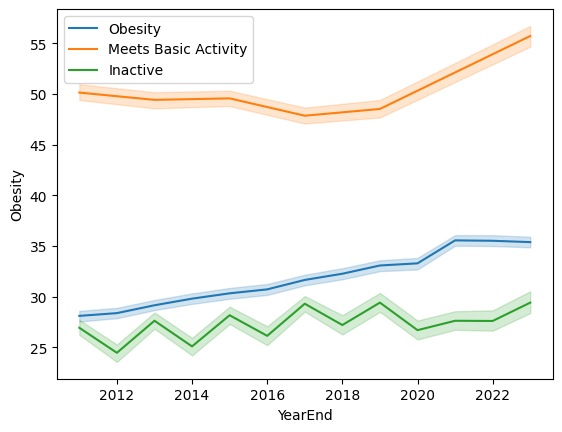

In [ ]:
sns.lineplot(data=pivoted_df, x='YearEnd', y='Obesity', label='Obesity')

sns.lineplot(data=pivoted_df, x='YearEnd', y='Meets Basic Activity', label='Meets Basic Activity')

sns.lineplot(data=pivoted_df, x='YearEnd', y='Inactive', label='Inactive')